## 6 - Generating meshes from a CAD description

In this tutorial, we discuss how to load a CAD model description of an object into Netgen and generate a suitable mesh.

## Loading a geometry
Recall from tutorial [5](5_OCC_geometry.ipynb) that we can define object geometries using the Netgen OCC package and object primitives (e.g. cube, sphere, cone, ect). However, we can also load in $\texttt{.step}$ files directly into Netgen as a dimensionless solid.

This allows us to use standard CAD software (e.g. FreeCAD, Fusion360, Solidworks, AutoCAD) to define our geometry separately from Netgen.

In the file $\texttt{Tutorials/Examples/Example_10mm_cube.step}$, there is a homogeneous cube of side length 10 mm which we can load in using:
```python
geometry = OCCGeometry(filename)
```

We begin by importing the OCC module and the webgui visualisation.

In [1]:
from netgen.occ import *
from netgen.webgui import Draw as DrawGeo

and load in the geometry.

In [2]:
geo = OCCGeometry(r'Examples/Example_10mm_cube.step')

With objects loaded in this way, we access the geometry and its properties via the $\texttt{shape}$ attribute. So to visualise the geometry, we would use

In [4]:
DrawGeo(geo.shape)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

BaseWebGuiScene

Similarly, if we want to check the volume of the object, we would use

In [5]:
geo.shape.mass

999.9999999999998

<b>Note that the Netgen object description is dimensionless so to obtain the physical object we need to multiply each dimension by $\alpha$. The default being $\alpha=10^{-3}$ m. So if a $\texttt{.step}$ file is setup with units of mm we will need to specify that we want $\alpha=10^{-3}$ m in MPT-Calculator.</b>

Finally, we can center the object via the $\texttt{Move}$ method

In [6]:
cube = geo.shape.Move((-geo.shape.center.x, -geo.shape.center.y, -geo.shape.center.z))

For a single object, this is not strictly necessary since the MPT is independent of the object location, but it makes it slightly easier to generate a sufficient outer region. If you wanted to load in multiple objects, you would load them in using $\texttt{OCCGeometry}$ and position them using $\texttt{Move}$.

At this stage, all the methods available to a natively generated object are available to us. For example $\texttt{Rotation}$, which requires an axis and rotation angle.

<b>Important: Objects generated using CAD software and saved as a step - file may provide a suitable CAD description for CAD software, they are not necessarily best suited as a geometry to form the basis of mesh generation for finite element simulations. This is due to differing tolerances and design criteria between the CAD software and the meshing library, and can lead to distorted elements or an overly fine mesh. </b>

<b>The OCC files can be run independently of MPT-Calculator, so the user can check the generated mesh for consistency before committing to large simulations.</b>

## Assigning object properties

At this stage, $\texttt{cube}$ behaves like a natively generated OCC geometry object, and we can proceed as if it were generated directly in Netgen.

As with the other $\texttt{OCC}$ geometries, we first define a list of object names, conductivities, and relative permeabilities. Unlike previous versions, we can define alpha on an object by object basis in the OCC file itself.

In [7]:
material_name = ['cube']
sigma = [1e6]
mur = [1]
alpha = 0.001

and assign the appropriate material and boundary condition names

In [8]:
cube.bc('default')
cube.mat(material_name[0])
cube.maxh = 5

## Adding additional regions

In the same way as the coin example in tutorial [7](./7_OCC_geometry.ipynb) we can add additional regions by defining additional object primatives

In [9]:
box = Box(Pnt(-1000, -1000, -1000), Pnt(1000,1000,1000))
box.mat('air')
box.bc('outer')
box.maxh = 1000

and joining them together:

In [10]:
joined_object = Glue([box, cube])
DrawGeo(joined_object)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

BaseWebGuiScene

Finally, we can generate a mesh

In [10]:
nmesh = OCCGeometry(joined_object).GenerateMesh()
nmesh.Save(r'../VolFiles/OCC_step_cube.vol')

A valid $\texttt{.py}$ script to generate this example has been added to the $\texttt{OCC_Geometry/}$ directory as [$\texttt{OCC_step_cube.py}$](../OCC_Geometry/OCC_step_cube.py), which we can simulate with

Updated alpha from OCC file. Alpha=0.001
OCC_step_cube.geo
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 19533


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 19533 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [02:55<00:00, 13.53s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 9
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


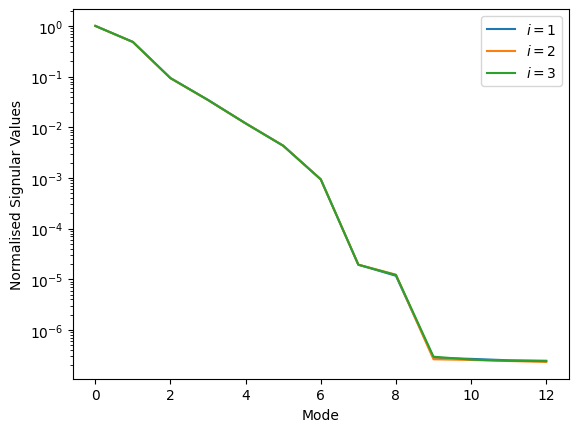

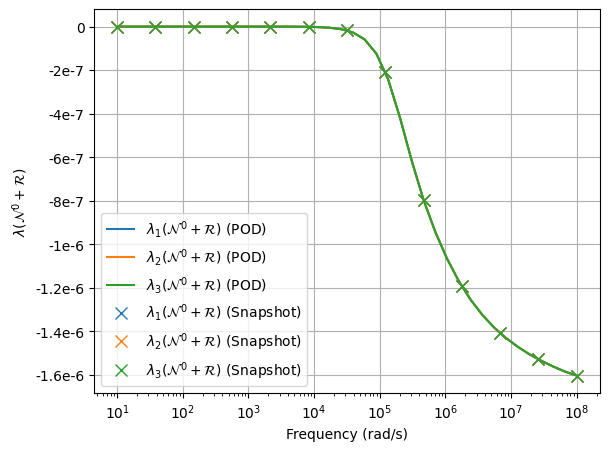

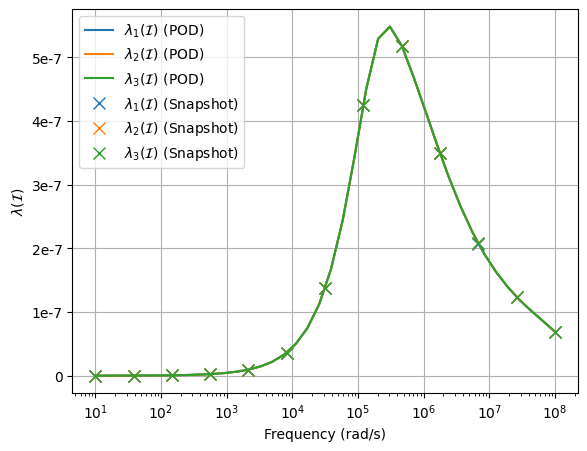

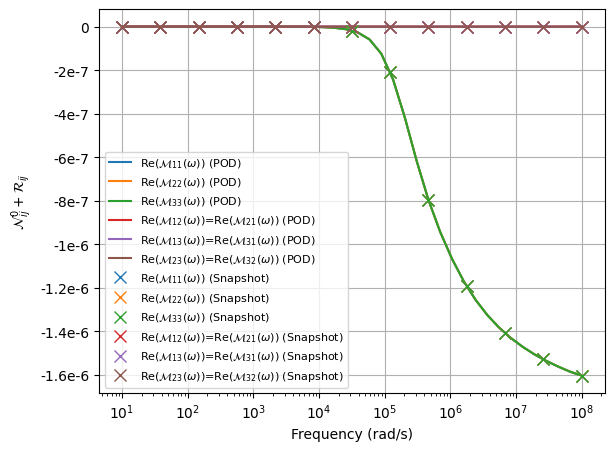

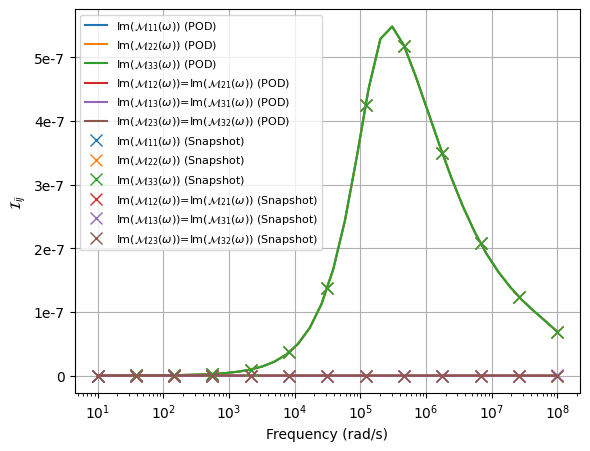

In [11]:
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path = r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()

from main import main
step_cube = main(geometry='OCC_step_cube.py', use_OCC=True, use_POD=True);

## Comparison with an equivalent .geo file

Using a dense mesh to ensure that the solutions are converged and independent of small changes to the number of elements, we now wish to compare an equivalent .geo file description of the object (stored in $\texttt{GeoFiles/Cube.geo}$) with the step file geometry we have loaded in.

Running the .geo file simulation, we see that the mesh contains slightly more elements, however the resultant tensor coefficients and eigenvalues are very similar.

Cube.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21706


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 21706 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [03:35<00:00, 16.57s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 9
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


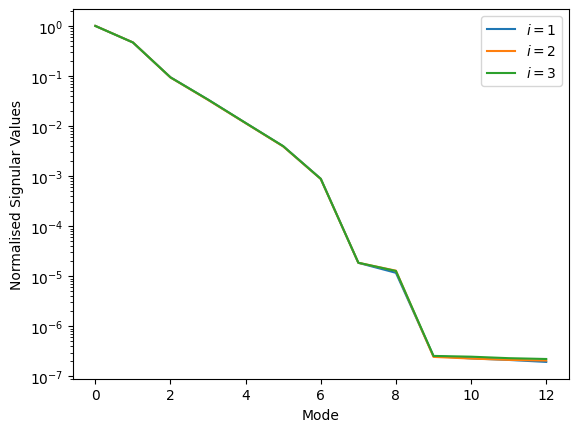

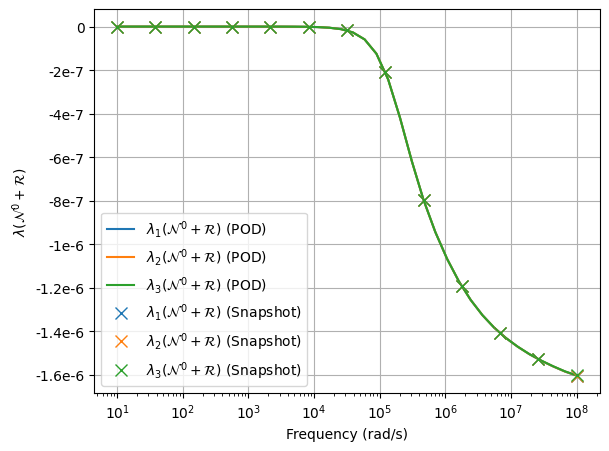

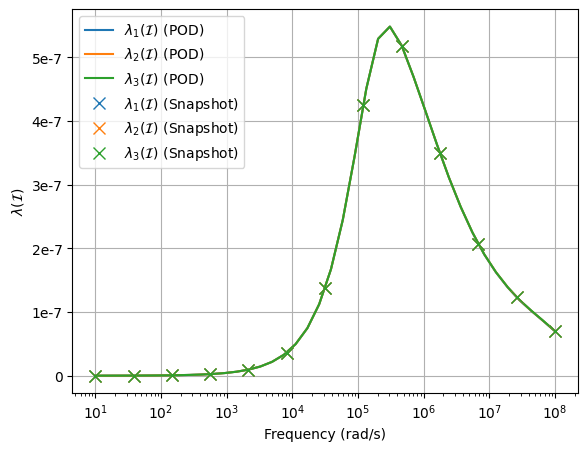

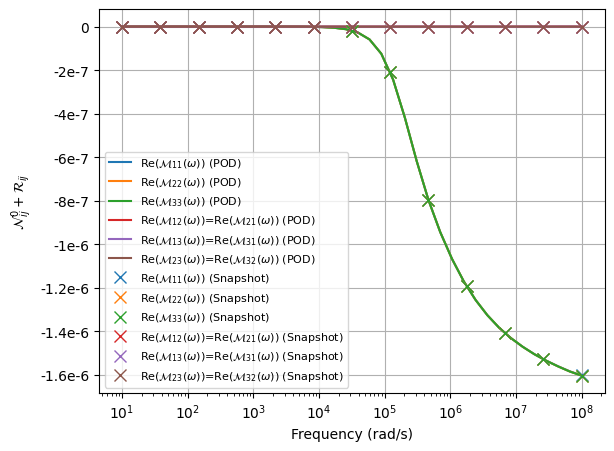

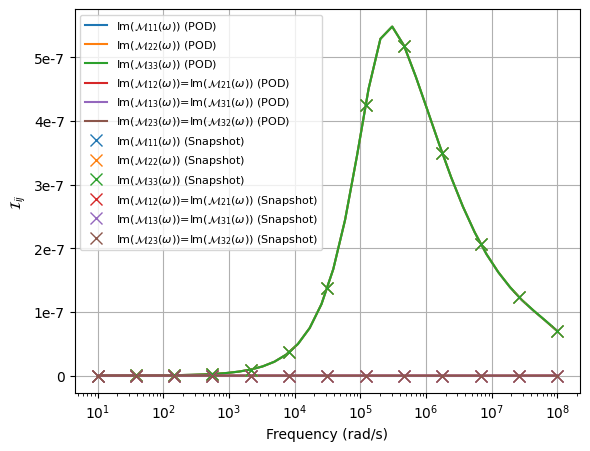

In [12]:
geo_cube = main(geometry='Cube.geo', use_POD=True)

if we plot the relative error between the loaded OCC geometry tensor coefficients and the $\texttt{.geo}$ file tensor coefficients, 

$\frac{||\mathcal{M}^{(OCC)} - \mathcal{M}^{(geo)}||_F}{|| \mathcal{M}^{(OCC)}||_F}$ 

we see that the two methods are in very good agreement.

In [13]:
import numpy as np
err = np.zeros(40)
for f in range(40):
    err[f]= np.linalg.norm(geo_cube['TensorArray'][f,:] - step_cube['TensorArray'][f,:])
    err[f] /= np.linalg.norm(step_cube['TensorArray'][f,:])

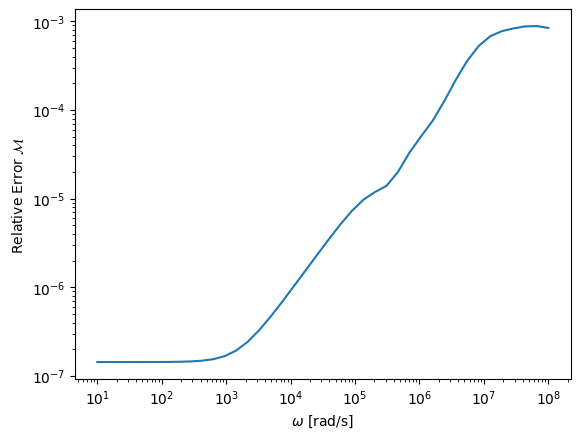

In [14]:
from matplotlib import pyplot as plt
plt.loglog(geo_cube['FrequencyArray'], err)
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Relative Error $\mathcal{M}$');